# Momi2: Gene Flow

This is a tutorial for the `momi` package. You can run the ipython notebook that created this tutorial at `docs/tutorial.ipynb`. 

An issue I had was that Momi2 was built using networkx1.8 or under, while the installation will get the networkx2 or over. After installing Momi2, I had to uninstall networkx and install a previous version.

Download previous version (networkx1.8.1)
https://pypi.org/project/networkx/1.8.1/#modal-close

Instructions to install it.
https://pypi.org/project/networkx/1.8.1/

We are wroking on an environment momi-py36. Before opening jupyter notebook we activate this environment.

source activate momi-py36

Import the `momi` package: 

In [5]:
import momi

Some `momi` operations can take awhile complete, so it is useful to turn
on status monitoring messages to check that everything is running
normally. Here, we output logging messages to the file `tutorial.log`.

In [2]:
import logging
logging.basicConfig(level=logging.INFO, 
                    filename="tutorial.log")

# Filtering VCF

First, I will filter the vcf file to get rid of loci with correlation coefficient higher than .7 (--maf=.3).

In [4]:
%%bash
vcftools --vcf pop5.snps.vcf --maf .3 --recode --out pop5


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf pop5.snps.vcf
	--maf 0.3
	--out pop5
	--recode

After filtering, kept 121 out of 121 Individuals
Outputting VCF file...
After filtering, kept 386 out of a possible 3471 Sites
Run Time = 2.00 seconds


Filtering the samples for Calcetas

In [7]:
%%bash
#cat pop5NoSites.txt

In [5]:
%%bash
# coping the file to the momi2 folder
#cp ../../data/n5nb_filter.vcf n5nb.vcf

# Subsetting the vcf file using a txt file with the ID of samples to remove
vcftools --vcf pop5.recode.vcf --keep pop5NoSites.txt --recode --recode-INFO-all --out pop5NoSites


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf pop5.recode.vcf
	--keep pop5NoSites.txt
	--recode-INFO-all
	--out pop5NoSites
	--recode

Keeping individuals in 'keep' list
After filtering, kept 91 out of 121 Individuals
Outputting VCF file...
After filtering, kept 386 out of a possible 386 Sites
Run Time = 0.00 seconds


Creating zip and tab files for Momi2

In [6]:
%%bash
## bgzip performs a blockwise compression
## The -c flag directs bgzip to leave the original vcf file 
##   untouched and create a new file for the vcf.gz
bgzip -c pop5NoSites.recode.vcf > pop5ncal.vcf.gz

## tabix indexes the file for searching
tabix pop5ncal.vcf.gz
ls

CalcetaSamples.txt
ID_4pop_ncal.txt
Ind_4pop.txt
M1-4.sh
Makefile
Momi-cb.ipynb
Momi-pop5.ipynb
Others
RAxML Tree.ipynb
RAxML.py
api.rst
cb
conf.py
index.rst
installation.rst
introduction.rst
momi_simdata.bed
momi_simdata.vcf.gz
momi_simdata.vcf.gz.tbi
n5nb.ncal.filter.bed
n5nb_allele_counts.gz
n5nb_ncal_fil.log
n5nb_ncal_fil.recode.vcf.gz
n5nb_ncal_fil.recode.vcf.gz.tbi
n5nb_sfs.gz
parallel.rst
pop.snps.fa
pop5.allele.counts.gz
pop5.ncal.recode.vcf
pop5.ncal.txt
pop5.ncal.vcf.gz
pop5.ncal.vcf.gz.tbi
pop5.recode.vcf
pop5.snps.vcf
pop5.snps2.bed
pop5.snps4.bed
pop5.vcf.log
pop5NoSites.recode.vcf
pop5NoSites.recode2.vcf
pop5NoSites.txt
pop5ncal-temporary.psam
pop5ncal.log
pop5ncal.vcf.gz
pop5ncal.vcf.gz.tbi
populations.samples.fa
python_tutorial.py
raxml.sh
requirements.txt
tutorial.ipynb
tutorial.log
tutorial_datasets
vcf2bed.py
wrens_ac.gz


#### The allele counts file

The allele counts file is an intermediate step necessary for generating the SFS. It’s a format internal to momi2, so we won’t spend a lot of time describing it, except to say that it is exactly what it says it is: A count of alleles in each population. Since each diploid individual has 2 alleles per snp, the total count of alleles per population will be 2n at maximum, and 0 at minimum.

In [7]:
%%bash
#sudo apt install bedops # using bedops to obtain the bed file
vcf2bed < pop5NoSites.recode2.vcf > pop5.snps2.bed

bash: line 2: pop5.snps2.bed: Permission denied


CalledProcessError: Command 'b'#sudo apt install bedops # using bedops to obtain the bed file\nvcf2bed < pop5NoSites.recode2.vcf > pop5.snps2.bed\n'' returned non-zero exit status 1.

Most convertion from vcf to bed require that the chromosomes IDs have numbers that match human notation. Because we didn't map the Radseq we have number of chromosomes IDs too high in the magnitud of the 10 thousands. I changed manually the chrm Ids for ones in the pop5NoSites.recode2.vcf files. Then, I put the right chrm Ids in the bed files. Make a copy of the vcf first. In this case the pop5NoSites.recode2.vcf is the copy. I got the original chrm Ids from the original vcf file.

In [1]:
ind2pop1 = {'1836':'CZ', '14F':'CFF', '11F':'CFF', '3F':'CFFxCFP', '5F':'CFFxCFP', '7F':'CFFxCFP', '9F':'CFF', '16F':'CFF', '14cb':'CB', '72':'CFFxCFP', '8F':'CFF', '1F':'CFF', '17F':'CFFxCFP', '2F':'CFF', '20F':'CFF', '6F':'CFFxCFP', '12F':'CFFxCFP', '10F':'CFF', '24F':'CFFxCFP', '95':'CFFxCFP', '3cb':'CB', '93':'CFFxCFP', '4F':'CFF', '66':'CFPxCZ', '71':'CFFxCFP', '73':'CFFxCFP', '1835':'CZ', '13cb':'CB', '60':'CFFxCFP', '79':'CFFxCFP', '15F':'CFF', '94':'CFFxCFP', '82':'CFFxCFP', '1cb':'CB', '23F':'CFF', '9':'CZ', '16':'CZ', '17':'CZ', '54':'CFPxCZ', '5cb':'CB', '2cb':'CB', '55':'CFPxCZ', '7':'CZ', '13F':'CFF', '61':'CFPxCZ', '12cb':'CB', '22':'CZ', '7cb':'CB', '26':'CZ', '19F':'CFFxCFP', '21F':'CFFxCFP', '22F':'CFF', '56':'CFPxCZ', '63':'CFPxCZ', '53':'CFPxCZ', '64':'CFPxCZ', '23':'CZ', '88':'CZ', '25F':'CFF', '25':'CZ', '21':'CZ', '3':'CZ', '19':'CZ', '59':'CFPxCZ', '92':'CFFxCFP', '15':'CZ', '26F':'CFF', '2':'CZ', '86':'CFFxCFP', '20':'CZ', '62':'CFPxCZ', '4':'CZ', '18':'CZ', '6':'CZ', '1':'CZ', '58B':'CFPxCZ', '77B':'CFFxCFP', '15Bcb':'CB', '85B':'CFFxCFP', '80B':'CFFxCFP', '52B':'CFPxCZ', '51B':'CFPxCZ', '57B':'CFPxCZ', '8B':'CZ', '24B':'CZ', '83B':'CFFxCFP', '65B':'CFPxCZ', '5B':'CZ', '14B':'CZ', '76B':'CFFxCFP', '75B':'CFFxCFP'}

In [3]:
#ind2pop1

In [7]:
## Create the snp allele counts array
wrens_ac1 = momi.SnpAlleleCounts.read_vcf("pop5ncal.vcf.gz", ancestral_alleles=False, bed_file="pop5.snps4.bed", ind2pop=ind2pop1)

In [10]:
%%sh
python -m momi.read_vcf --no_aa --verbose pop5ncal.vcf.gz pop5NoSites.txt wrens_ac.gz --bed pop5.snps4.bed

#### Generate the SFS

In [9]:
sfs1 = wrens_ac1.extract_sfs(n_blocks=50)
print(sfs1.n_snps())
print("Avg pairwise heterozygosity", sfs1.avg_pairwise_hets[:5])
print("populations", sfs1.populations)
print("percent missing data per population", sfs1.p_missing)

6.0
Avg pairwise heterozygosity [[0.11111111 0.17540323 0.18282313 0.51724138 0.32312925]
 [0.         0.30414747 0.32312925 0.48045977 0.38065661]
 [0.         0.11981567 0.38095238 0.51494253 0.24571429]
 [0.         0.40645161 0.48979592 0.50804598 0.45918367]
 [0.         0.06182796 0.24969988 0.51494253 0.18189885]]
populations ('CB', 'CFF', 'CFFxCFP', 'CFPxCZ', 'CZ')
percent missing data per population [0.01851852 0.10416667 0.1        0.02222222 0.05333333]


The momi site frequency spectrum is represented somewhat differently than you might be used to if you have used dadi or fastsimcoal2. Here we load the SFS generated above into the sfs object and print a few properties.

In [25]:
#%%bash
#python -m momi.extract_sfs sfs 100 wrens_ac.gz

In [3]:
#sfs = momi.Sfs.load("wrens_ac.gz")
#print("Avg pairwise heterozygosity", sfs.avg_pairwise_hets[:5])
#print("populations", sfs.populations)
#print("percent missing data per population", sfs.p_missing)

Avg pairwise heterozygosity [[3.26758833 5.73578685 6.19774743 6.68696509]
 [1.39605045 7.07781226 7.99858277 6.90602716]
 [2.7593702  6.20478861 8.22692344 6.51572001]
 [3.74470637 6.0297432  7.9449113  6.86556435]
 [2.72352741 6.41419466 7.77535247 7.78840795]]
populations ('CFF', 'CFFxCFP', 'CFPxCZ', 'CZ')
percent missing data per population [0.06794894 0.07844802 0.03303616 0.05453311]


#### Inference procedure

In the previous examples where we constructed and plotted DemographicModels, we had specified all the values for population sizes, divergence times, and migration fractions. This is useful when we are developing the models we want to test, because we can construct the model with toy parameter values, plot it and then visually inspect whether the model meets our expectations. Once we have settled on one or a handful of models to test, we can incorporate the observed SFS in an inference procedure in order to test which model is the best fit to the data. The best fitting model will then provide a set of maximum likelihood parameter values for the parameters we are interested in (like divergence time). We can then perform a bootstrap analysis, by randomly resampling the observed SFS, re-estimating parameters under the most likely model, and constructing bootstrap confidence intervals on these values (typically 50-100 replicates, but here 10 for speed).

## Fitting Models

We will start by fitting a model without migration. I will estimate time from divergence of all groups and models for migration between CZ and CZxCFP. Use DemographicModel() to initialize it:

## No Gene Flow: M1

In [10]:
# CZ and CFPxCZ
# No gene flow: estimating effective population size and time from divergence
m1 = momi.DemographicModel(N_e=3.5e5, gen_time=2, muts_per_gen=2.5e-9)
m1.set_data(sfs1)
m1.add_size_param("n_cb")
m1.add_size_param("n_cz")
m1.add_size_param("n_cfpxcz")
m1.add_size_param("n_cfpxcff")
m1.add_size_param("n_cff")

m1.add_time_param("tdiv")
m1.add_leaf("CZ", N="n_cz")
m1.add_leaf("CFPxCZ", N="n_cfpxcz")
m1.move_lineages("CZ","CFPxCZ",t="tdiv")
m1.optimize()

ValueError: Exception encountered at parameter values {'n_cb': 'Autograd ArrayBox with value 46830.923830962834', 'n_cz': 'Autograd ArrayBox with value 249033.79619814493', 'n_cfpxcz': 'Autograd ArrayBox with value 739156.0002305994', 'n_cfpxcff': 'Autograd ArrayBox with value 30127.991294114316', 'n_cff': 'Autograd ArrayBox with value 527412.9288967602', 'tdiv': 'Autograd ArrayBox with value 492467.7699138916'} (internal scaling x = {'n_cb': 'Autograd ArrayBox with value 10.754299029315119', 'n_cz': 'Autograd ArrayBox with value 12.425343893940067', 'n_cfpxcz': 'Autograd ArrayBox with value 13.513264274040452', 'n_cfpxcff': 'Autograd ArrayBox with value 10.313209961933612', 'n_cff': 'Autograd ArrayBox with value 13.175739067005022', 'tdiv': 'Autograd ArrayBox with value 492467.7699138916'})

In [61]:
# CZ and CFPxCZ
# No gene flow: estimating effective population size and time from divergence
m1 = momi.DemographicModel(N_e=1e5, gen_time=2)
m1.set_data(sfs)
m1.add_size_param("n_cz")
m1.add_size_param("n_cfpxcz")
m1.add_time_param("tdiv")
m1.add_leaf("CZ", N="n_cz")
m1.add_leaf("CFPxCZ", N="n_cfpxcz")
m1.move_lineages("CZ","CFPxCZ",t="tdiv")
#m1.optimize()

In [56]:
del m1

In [62]:
m1.stochastic_optimize(
    num_iters=100,
    n_minibatches=10)

 cross_entropy: 6.692776366779928
           fun: 6.692776366779928
           jac: array([ 7.52730250e-02, -9.62011733e-04, -2.25871247e-06])
       message: 'Maximum number of iterations reached'
           nit: 99
    parameters: ParamsDict({'n_cz': 55542.7018735104, 'n_cfpxcz': 1496703.6941613792, 'tdiv': 32899.71194382831})
       success: False
             x: array([1.09249074e+01, 1.42187757e+01, 3.28997119e+04])

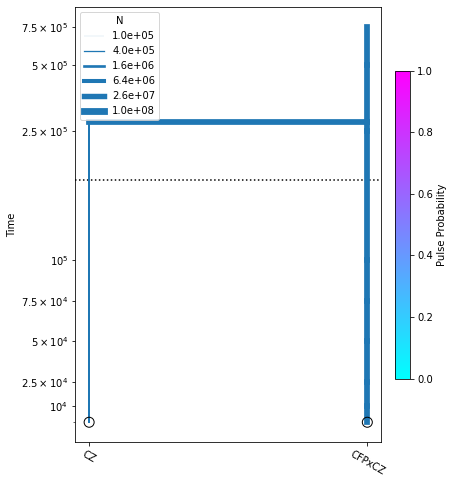

In [36]:
yticks = [1e4, 2.5e4, 5e4, 7.5e4, 1e5, 2.5e5, 5e5, 7.5e5]

fig1 = momi.DemographyPlot(
    m1, ["CZ", "CFPxCZ"],
    figsize=(6,8),
    major_yticks=yticks,
    linthreshy=1.5e5)

##### Bootstrapping for Confidence Intervals

In [37]:
n_bootstraps = 50
# make copies of the original model to avoid changing them
m1_copy = m1.copy()

bootstrap_results = []
for i in range(n_bootstraps):
    print(f"Fitting {i+1}-th bootstrap out of {n_bootstraps}")

    # resample the data
    resampled_sfs = sfs.resample()
    # tell models to use the new dataset
    m1_copy.set_data(resampled_sfs)
    #add_pulse_copy.set_data(resampled_sfs)

    # choose new random parameters for submodel, optimize
    m1_copy.set_params(randomize=True)
    m1_copy.optimize()
    # initialize parameters from submodel, randomizing the new parameters
    #add_pulse_copy.set_params(pulse_copy.get_params(),
                              #randomize=True)
    #add_pulse_copy.optimize()

    bootstrap_results.append(m1_copy.get_params());

Fitting 1-th bootstrap out of 50
Fitting 2-th bootstrap out of 50
Fitting 3-th bootstrap out of 50
Fitting 4-th bootstrap out of 50
Fitting 5-th bootstrap out of 50
Fitting 6-th bootstrap out of 50
Fitting 7-th bootstrap out of 50
Fitting 8-th bootstrap out of 50
Fitting 9-th bootstrap out of 50
Fitting 10-th bootstrap out of 50
Fitting 11-th bootstrap out of 50
Fitting 12-th bootstrap out of 50
Fitting 13-th bootstrap out of 50
Fitting 14-th bootstrap out of 50
Fitting 15-th bootstrap out of 50
Fitting 16-th bootstrap out of 50
Fitting 17-th bootstrap out of 50
Fitting 18-th bootstrap out of 50
Fitting 19-th bootstrap out of 50
Fitting 20-th bootstrap out of 50
Fitting 21-th bootstrap out of 50
Fitting 22-th bootstrap out of 50
Fitting 23-th bootstrap out of 50
Fitting 24-th bootstrap out of 50
Fitting 25-th bootstrap out of 50
Fitting 26-th bootstrap out of 50
Fitting 27-th bootstrap out of 50
Fitting 28-th bootstrap out of 50
Fitting 29-th bootstrap out of 50
Fitting 30-th bootstrap

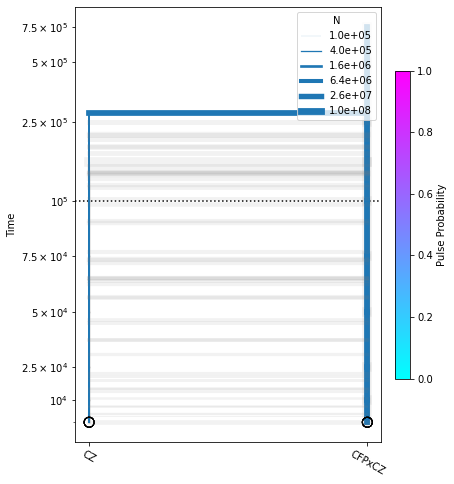

In [38]:
fig1_boot = momi.DemographyPlot(
    m1, ["CZ", "CFPxCZ"],
    linthreshy=1e5, figsize=(6,8),
    major_yticks=yticks,
    draw=False)

# plot bootstraps onto the canvas in transparency
for params in bootstrap_results:
    fig1_boot.add_bootstrap(
        params,
        # alpha=0: totally transparent. alpha=1: totally opaque
        alpha=1/10)

# now draw the inferred demography on top of the bootstraps
fig1_boot.draw()
fig1_boot.draw_N_legend(loc="upper right")

#### Model Selection CZ and CFPxCZ: M1-M4

In [46]:
import numpy as np

In [47]:
AICs = []
for model in [m1,m2,m3,m4]:
    lik1 = model.log_likelihood()
    nparams1 = len(model.get_params())
    aic1 = 2*nparams1 - 2*lik1
    print("AIC {}".format(aic1))
    AICs.append(aic1)

minv = np.min(AICs)
delta_aic = np.array(AICs) - minv
print("Delta AIC per model: ", delta_aic)
print("AIC weight per model: ", np.exp(-0.5 * delta_aic))

NameError: name 'm2' is not defined